In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
m, c = 4, 100

In [35]:
X = np.linspace(10, 30, 100)
noise = np.random.rand(100) * 100
y = m*X*X + noise

In [36]:
X_mod = (X-X.mean())/X.std()
y_mod = (y-y.mean())/y.std()

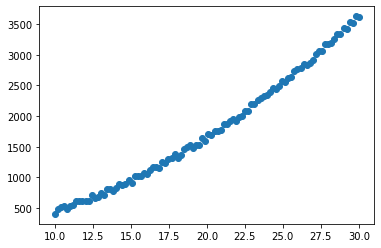

In [37]:
plt.scatter(X, y)

In [38]:
class CustomLinearReg:
    def __init__(self, lr=.01, iters=300):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.a_ = np.random.random()
        self.b_ = np.random.random()
        self.c_ = np.random.random()
        
        error = []
        for i in range(self.iters):
            errors =  self.gradient_decend(X, y)
            error.append(errors)
            
        return error
    
    def gradient_decend(self, X, y):
        delta_a, delta_b, delta_c, error = self.gradient(X, y)
        self.a_ += delta_a
        self.b_ += delta_b
        self.c_ += delta_c
        return error
    
    def gradient(self, X, y):
        yh = self.hypo(X)
        error = np.mean((yh-y)**2)
        dmseda = np.mean(2*(yh-y)*X*X)
        dmsedb = np.mean(2*(yh-y)*X)
        dmsedc = np.mean(2*(yh-y))
        delta_a = -dmseda*self.lr
        delta_b = -dmsedb*self.lr
        delta_c = -dmsedc*self.lr
        return delta_a, delta_b, delta_c, error
        
    def hypo(self, X):
        return X*X*self.a_ + X*self.b_ + self.c_

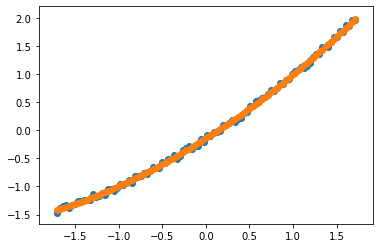

In [45]:
model = CustomLinearReg(lr = 0.1, iters=100)
error = model.fit(X_mod, y_mod)

yh = model.hypo(X_mod)

plt.scatter(X_mod, y_mod)
plt.scatter(X_mod, yh)